# **1.1 Оценки математического ожидания, дисперсии, медианы**

In [44]:
# @title
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Задание 1

Пусть случайная величина ξ имеет распределение, задаваемое плотностью $f_ξ(x) = θ^2xe^{−θx}$. Для каждого $θ ∈ \{0.5, 2, 8\}$:

(a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $ξ$. Привести в отчет.

(b) Для $k ∈ \{2^4, 2^5, . . . , 2^{15}\}$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — $k$, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

#### Решение

(a) Случайная величина $\xi$ имеет гамма-распределение $\xi \sim \Gamma(2,\theta)$:

* Математическое ожидание
$$E\xi=\frac{2}{\theta}$$

* Дисперсия
$$D\xi=\frac{2}{\theta^2}$$

* Математическое ожидание квадрата
$$E\xi^2=D\xi+(E\xi)^2 =\frac{6}{\theta^2}$$

Для $\theta=0.5$:
$$E\xi=4, \quad D\xi=8, \quad E\xi^2=24.$$

Для $\theta=2$:
$$E\xi=1, \quad D\xi=0.5, \quad E\xi^2=1.5.$$

Для $\theta=8$:
$$E\xi=0.25, \quad D\xi=0.03125, \quad E\xi^2=0.09375.$$

(b) Построим графики

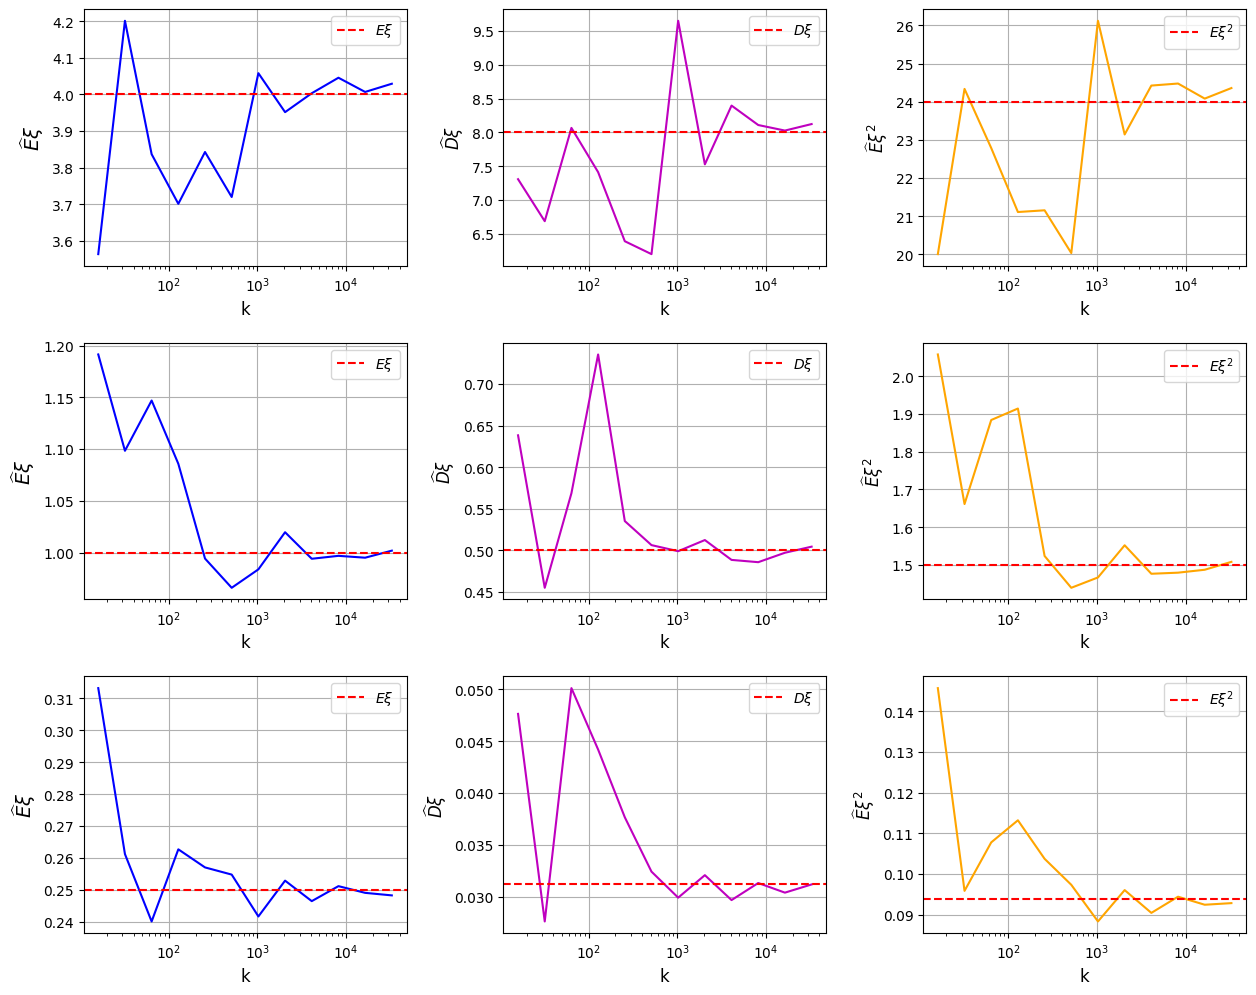

In [12]:
# @title
k_ = [2**i for i in range(4,16)]
thetas = [0.5, 2, 8]
fig, axs = plt.subplots(3, 3,figsize=(15, 12), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
idx = 0

for theta in thetas:
  means = []
  means_of_square = []
  vars = []
  for k in k_:
    sample = sps.gamma(a=2, scale=1/theta).rvs(size=k)
    means.append(np.mean(sample))
    means_of_square.append(np.mean(sample**2))
    vars.append(np.var(sample))

  # График оценки Eξ
  axs[idx,0].plot(k_ ,means, color='blue')
  axs[idx,0].axhline(2/theta, label='$E\\xi$', color='red', linestyle='dashed')
  axs[idx,0].set_xscale('log')
  axs[idx,0].set_xlabel('k', fontsize=12)
  axs[idx,0].set_ylabel('$\\widehat{E}\\xi$', fontsize=14)
  axs[idx,0].legend()
  axs[idx,0].grid(True)

  # График оценки Dξ
  axs[idx,1].plot(k_, vars, color='m')
  axs[idx,1].axhline(2/theta**2, label='$D\\xi$', color='red', linestyle='dashed')
  axs[idx,1].set_xscale('log')
  axs[idx,1].set_xlabel('k', fontsize=12)
  axs[idx,1].set_ylabel('$\\widehat{D}\\xi$', fontsize=12)
  axs[idx,1].legend()
  axs[idx,1].grid(True)

  # График оценки E(ξ^2)
  axs[idx,2].plot(k_, means_of_square, color='orange')
  axs[idx,2].axhline(6/theta**2, label='$E\\xi^2$', color='red', linestyle='dashed')
  axs[idx,2].set_xscale('log')
  axs[idx,2].set_xlabel('k', fontsize=12)
  axs[idx,2].set_ylabel('$\\widehat{E}\\xi^2$', fontsize=12)
  axs[idx,2].legend()
  axs[idx,2].grid(True)

  idx+=1

При увеличении размера выборки $k$ оценки матиматического ожидания, дисперсии и квадрата математического ожидания сходятся к теоретическим значениям.

### Задание 2

Дана плотность распределения случайной величины $ξ$:
$$
  f^{\lambda,a}_{\xi}(x) = \begin{cases}
  \lambda e^{-\lambda (x-a)}, & x \geq 2 \\
   0, & else
\end{cases}
$$

Пусть $(λ, a) = (2, 2)$.

(a) Аналитически вычислите значение моды, математического ожидания и медианы.

(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического жидания и медианы.

(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы. То же самое, для второй.

(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.

#### Решение

(a) Случайная величина $\xi$ имеет экспоненциальное распределение $\xi \sim Exp(2,2)$:
* Мода

$f_\xi(x) = 2 e^{-2(x-2)}$ монотонно убывающая функция, так как $f^{'}_\xi(x) = -4 e^{-2(x-2)}<0 ⇒$ максимум достигается при $x=2$.
$$mode=2$$

* Математическое ожидание
$$\mathsf{E}\xi = \int\limits_2^{∞}x\cdot2 e^{-2(x-2)}dx=\int\limits_0^{∞}(t+2)\cdot2 e^{-2t}dt=\int\limits_0^{∞}t\cdot2 e^{-2t}dt+\int\limits_0^{∞}4 e^{-2t}dt=\frac{1}{2}+2=2.5$$

* Медиана
$$F_\xi(x)=1-e^{-2(x-2)}=0.5 ⇒ x=2+\frac{ln2}{2}$$

$$median\approx 2.34657$$




(b) Создадим две выборки и построим для каждой оценки  моды, математического ожидания и медианы:

In [46]:
# @title
# Экспоненциальное распределение Exp(2,2)
distr = sps.expon(loc=2, scale=1/2)

# Выборка маленького размера
sample_small = distr.rvs(size=20)

mode_sample_small = stats.mode(sample_small)[0]
mean_sample_small = sample_small.mean()
median_sample_small = np.median(sample_small)

print(f'Выборка маленького размера')
print(f'  Оценка моды: {mode_sample_small:.4f}')
print(f'  Оценка мат.ожидания: {mean_sample_small:.4f}')
print(f'  Оценка медианы: {median_sample_small:.4f}')

# Выборка большого размера
sample_large = distr.rvs(size=10000)

mode_sample_large = stats.mode(sample_large)[0]
mean_sample_large = sample_large.mean()
median_sample_large = np.median(sample_large)

print(f'\nВыборка большого размера')
print(f'  Оценка моды: {mode_sample_large:.4f}')
print(f'  Оценка мат.ожидания: {mean_sample_large:.4f}')
print(f'  Оценка медианы: {median_sample_large:.4f}')

Выборка маленького размера
  Оценка моды: 2.0323
  Оценка мат.ожидания: 2.4273
  Оценка медианы: 2.2409

Выборка большого размера
  Оценка моды: 2.0001
  Оценка мат.ожидания: 2.4981
  Оценка медианы: 2.3438


(с) Построим графики для первой и второй выборки:

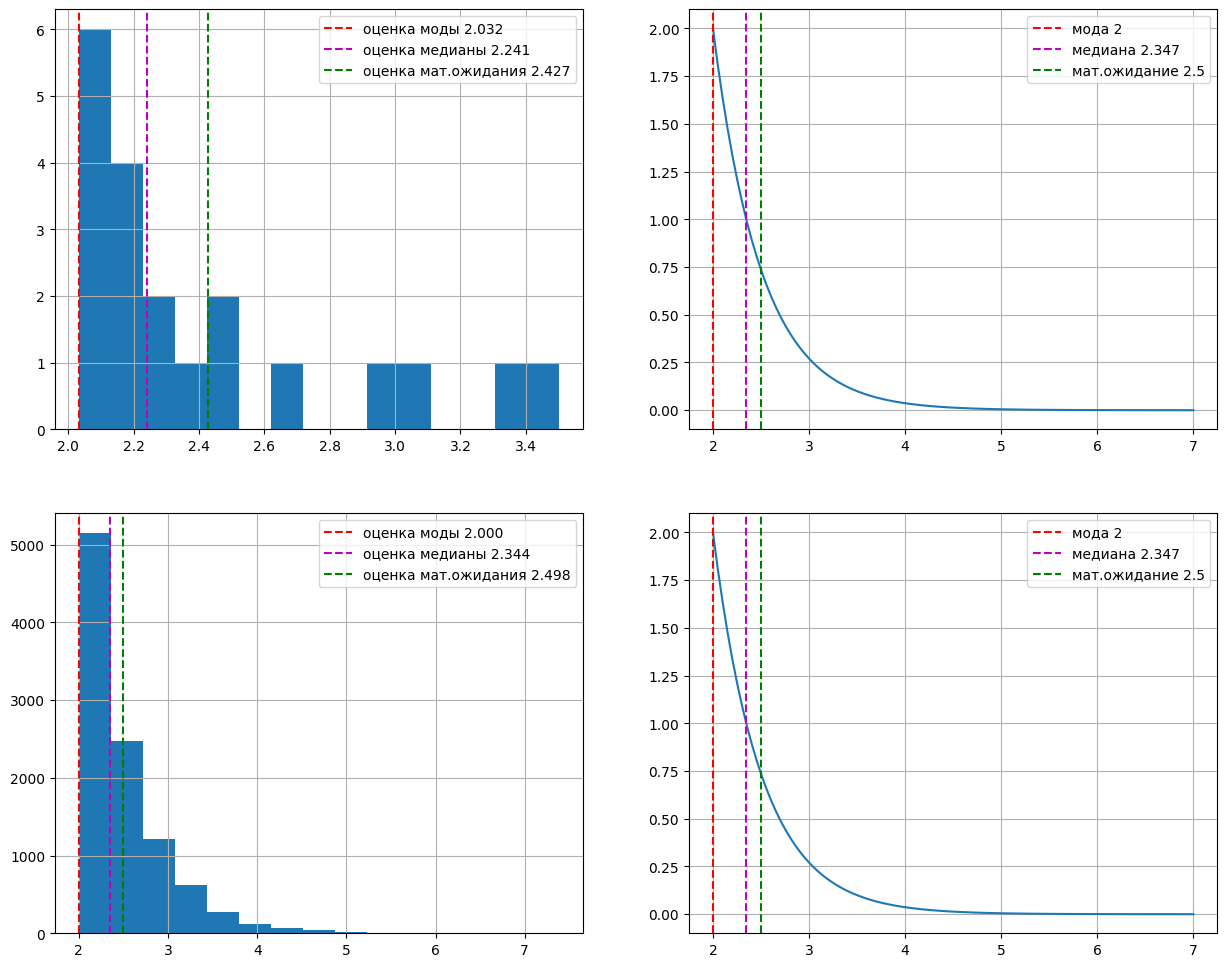

In [51]:
# @title
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
x=np.linspace(2,7,100)

# Гистограмма и оценки моды, математического ожидания и медианы для выборки маленького размера
ax1, ax2 = axs[0,0], axs[0,1]
ax1.hist(sample_small, bins=15)
ax1.axvline(mode_sample_small, color='r', label=f'оценка моды {mode_sample_small:.3f}', linestyle='dashed')
ax1.axvline(median_sample_small, color='m', label=f'оценка медианы {median_sample_small:.3f}', linestyle='dashed')
ax1.axvline(mean_sample_small, color='g', label=f'оценка мат.ожидания {mean_sample_small:.3f}', linestyle='dashed')
ax1.grid(True)
ax1.legend()

# Функция распределения плотности и аналитические значения мод, математического жидания и медианы для выборки маленького размера
ax2.plot(x, distr.pdf(x))
ax2.axvline(2, color='r', label='мода 2', linestyle='dashed')
ax2.axvline(2.34657, color='m', label='медиана 2.347', linestyle='dashed')
ax2.axvline(2.5, color='g', label='мат.ожидание 2.5', linestyle='dashed')
ax2.grid(True)
ax2.legend()

# Гистограмма и оценки моды, математического ожидания и медианы для выборки большого размера
ax3, ax4 = axs[1,0], axs[1,1]
ax3.hist(sample_large, bins=15)
ax3.axvline(mode_sample_large, color='r', label=f'оценка моды {mode_sample_large:.3f}', linestyle='dashed')
ax3.axvline(median_sample_large, color='m', label=f'оценка медианы {median_sample_large:.3f}', linestyle='dashed')
ax3.axvline(mean_sample_large, color='g', label=f'оценка мат.ожидания {mean_sample_large:.3f}', linestyle='dashed')
ax3.grid(True)
ax3.legend()

# Функция распределения плотности и аналитические значения мод, математического жидания и медианы для выборки большого размера
ax4.plot(x, distr.pdf(x))
ax4.axvline(2, color='r', label='мода 2', linestyle='dashed')
ax4.axvline(2.34657, color='m', label='медиана 2.347', linestyle='dashed')
ax4.axvline(2.5, color='g', label='мат.ожидание 2.5', linestyle='dashed')
ax4.grid(True)
ax4.legend()

(c) Посмотрим на то, сходится ли медиана к математическому ожиданию, или нет при изменени размера выборки:

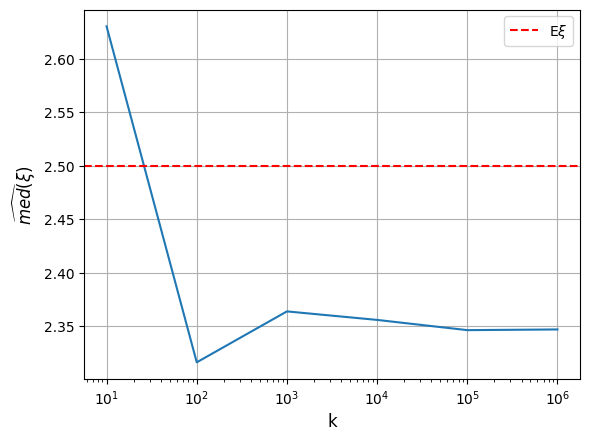

In [86]:
# @title
medians = dict()
k_ = [10**i for i in range(1,7)]

for k in k_:
  sample = distr.rvs(size=k)
  medians[k] = np.median(sample)

plt.plot(medians.keys(), medians.values())
plt.xscale('log')
plt.axhline(2.5, color='r', label='$\\mathsf{E}\\xi$', linestyle='dashed')
plt.xlabel('k', fontsize=12)
plt.ylabel('$\\widehat{med}(\\xi)$', fontsize=12)
plt.grid(True)
plt.legend()

# **1.2 Моделирование совместного распределения двух СВ**

### Задание 1

Пусть совместное распределение двух случайных величин задано таблицей

$$
\begin{array}{  c | c | c | c | c  }
\xi\backslash \eta & 1 & 2 & 3 & \ldots \\ \hline
-1 & \frac{2}{5}\cdot \frac{1}{2^1} &\frac{2}{5}\cdot \frac{1}{2^2}& \frac{2}{5}\cdot \frac{1}{2^3}&  \ldots\\ \hline
0 & \frac{1}{5}\cdot \frac{1}{2^1} &\frac{1}{5}\cdot \frac{1}{2^2}& \frac{1}{5}\cdot \frac{1}{2^3}&  \ldots\\ \hline
1 & \frac{2}{5}\cdot \frac{1}{2^1} &\frac{2}{5}\cdot \frac{1}{2^2}& \frac{2}{5}\cdot \frac{1}{2^3}&  \ldots\\
\end{array}
$$

где $η$ принимает все значения из $N$. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

#### Решение

Определим маргинальное распределение $\xi$:

$\mathsf{P}(\xi=-1)=\mathsf{P}(\xi=1)=\frac{2}{5}(\frac{1}{2}+\frac{1}{2^2}+\frac{1}{2^3}+\ldots)=\frac{2}{5}\sum^{∞}_{n=1}\frac{1}{2^n} = \frac{2}{5}$

$\mathsf{P}(\xi=0)=\frac{1}{5}(\frac{1}{2}+\frac{1}{2^2}+\frac{1}{2^3}+\ldots)=\frac{1}{5}\sum^{∞}_{n=1}\frac{1}{2^n} = \frac{1}{5}$

Тогда
$$
\begin{array}{  c | c | c | c | c  }
\xi & -1 & 0 & 1 \\ \hline
\mathsf{P} &
\frac{2}{5} &\frac{1}{2} & \frac{2}{5}\\
\end{array}
$$

Теперь определим маргинальное распределение $\eta$:

$$\mathsf{P}(\eta=k)=\sum_a\mathsf{P}(\xi=a, \eta=k)=\frac{2}{5}\cdot\frac{1}{2^k}+\frac{1}{5}\cdot\frac{1}{2^k}+\frac{2}{5}\cdot\frac{1}{2^k}=\frac{1}{2^k}\Bigl(\frac{2}{5}+\frac{1}{5}+\frac{2}{5}\Bigl) = \frac{1}{2^k}.$$

Тогда случайная велична $\eta$ имеет геометрическое распределение $\eta \sim Geom(\frac{1}{2})$.

Исследуем на независимость случайные величины $\xi$ и $\eta$:

$$\mathsf{P}(\xi=a,\eta=k)=\mathsf{P}(\xi=a)\mathsf{P}(\eta=k)=\frac{1}{2^k}\mathsf{P}(\xi=a)$$

Равенство выполняется для всех $a=\{-1,0,1\}$ и $k=\{1,2,3...\}$ $⇒ \xi$ и $\eta$ независимы. Тогда $$\mathsf{cov}(\xi, \eta)=0 \quad \rho(\xi,\eta) = \frac{\mathsf{cov}(\xi, \eta)}{\sqrt{\mathsf{D}\xi}\cdot\sqrt{\mathsf{D}\eta}} =0.$$

Корреляционная матрица:

$$
\begin{pmatrix}
1 & \rho(\xi,\eta)\\
\rho(\xi,\eta) & 1
\end{pmatrix}=\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}.
$$

Вычислим корреляционную матрицу на основе моделирования:

In [24]:
xi_distribution = sps.rv_discrete(name='xi_distribution', values=([-1, 0, 1], [0.4, 0.2, 0.4]))
xi_sample = xi_distribution.rvs(size=1000000)

eta_distribution = sps.geom(1/2)
eta_sample = eta_distribution.rvs(size=1000000)

np.corrcoef(xi_sample, eta_sample)

array([[1.        , 0.00133795],
       [0.00133795, 1.        ]])